# Kernel Recursive Least Squares (KRLS) & Kernel Least Mean Squares

Example: Time series prediction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from knlms import *
from krls import *

In [23]:
num_data = 3000
num_experiments = 10

# AWGN
def generate_data(num_data):
    v = 0.1*np.random.normal(0,1,num_data+2) 

    # Initial conditions
    d_true =[0.1 , 0.1]
    d = [d_true[0] + v[0], d_true[1] + v[1]]

    # Grab new data
    new_d_true = lambda d: d.append((0.8 - 0.5 * np.exp(-(d[-1]**2)))*d[-1] - (0.3 + np.exp(-(d[-1]**2)))*d[-2] + 0.1*np.sin(np.pi*d[-1]))
    for i in range(2,num_data+2):
        new_d_true(d_true)
        d.append(d_true[-1] + v[i])
    d_true = d_true[2::]
    d = d[2::]
    return d,d_true

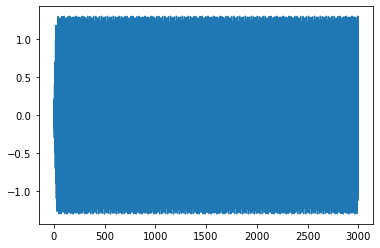

In [4]:
plt.plot(range(len(d_true)),d_true)

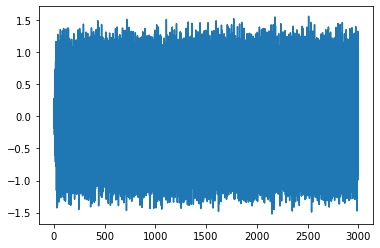

In [5]:
plt.plot(range(len(d)),d)

In [3]:

# Kernel from Richard Paper

gauss_kernel = lambda u_i,u_j: np.exp(-3.73 * (np.linalg.norm(u_i - u_j,ord=2)**2))
nmse = lambda D_n, Phi_n: np.sum((D_n - Phi_n)**2)

kernel = gauss_kernel


step_size = 0.09
reg_coeff = 0.03
threshold = 0.6


In [20]:
for i in range(len(num_experiments)):
    print('experiment',i)
    d,d_true = generate_data(num_data)
    mse_KNLMS = KNLMS(d,d_true,kernel,step_size,reg_coeff,0.5)
    mse_KRLS = KRLS(d,d_true,kernel,0.6)

number of SVs 30
number of SVs 30


In [25]:
mse_KNLMS = KNLMS(d,d_true,kernel,step_size,reg_coeff,0.5)
mse_KRLS = KRLS(d,d_true,kernel,0.6)

number of SVs 24
number of SVs 26


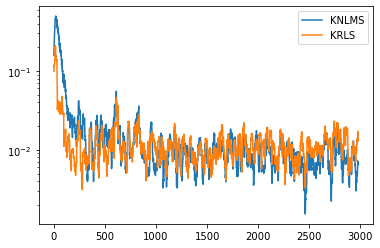

In [26]:
plt.semilogy(range(len(mse_KNLMS)),mse_KNLMS, label='KNLMS')
plt.semilogy(range(len(mse_KRLS)),mse_KRLS, label='KRLS')
plt.legend()
plt.show()